# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.627852e+01     1.297651e+01
 * time: 0.0015399456024169922
     1     3.508482e+01     8.389891e+00
 * time: 0.003873109817504883
     2     2.564593e+01     3.050242e+00
 * time: 0.009556055068969727
     3     2.321631e+01     3.795540e+00
 * time: 0.014470100402832031
     4     2.061905e+01     2.319928e+00
 * time: 0.019463062286376953
     5     1.975712e+01     1.685606e+00
 * time: 0.024634122848510742
     6     1.910903e+01     1.631213e+00
 * time: 0.028825044631958008
     7     1.860480e+01     1.468524e+00
 * time: 0.03293609619140625
     8     1.826021e+01     1.062247e+00
 * time: 0.03700995445251465
     9     1.808172e+01     1.574258e+00
 * time: 0.04119110107421875
    10     1.795673e+01     9.494170e-01
 * time: 0.04568290710449219
    11     1.785300e+01     5.843139e-01
 * time: 0.0497739315032959
    12     1.778539e+01     4.572993e-01
 * time: 0.05388307571411133
    13     1.774402e+01     7.968036e-01
 

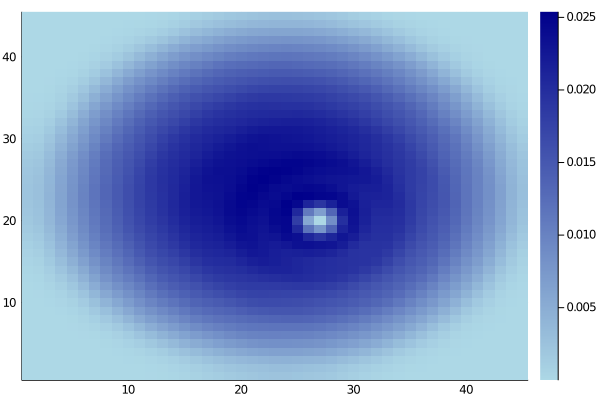

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)